# Wrangling the Range

In this activity, you’ll calculate a range of possible performance outcomes by using confidence intervals and the related z-scores.

Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information (from 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `V` (Visa)

    - `SQ` (Square, Inc.)

    - `GS` (Goldman Sachs)
 
> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_barset` function to make the API call. Be sure to set the `df` property at the end of the `get_barset` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

> **Hint** Use both the head and tail functions to display the first five and the last five rows of the DataFrame. You need the price of each stock on the last day of the period for later use in your confidence interval calculations.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all four stocks.

9. Based on your calculations and plots, answer the following questions: Which is the least volatile stock in the group? Which is the most volatile?

10. With a 95% confidence level, calculate the downside and upside performance expectations for both SPY and V based on the mean and standard deviation values.

11. With a 99% level of confidence, calculate the downside and upside performance expectations for both SQ and GS based on the mean and standard deviation values. 

12. Identify the lower and upper performance bounds for the start of each tail for SPY and SQ stocks. Note that the tail risk occurs when the performance measures outside the 99.7% confidence interval.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)



## Import the required libraries and dependencies

In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline

## Step 1: Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information (from 2019-05-01 to 2020-05-01) for the following stock tickers:

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_barset` function. 

In [5]:
# Create the list for the required tickers
tickers = ["SPY", "V", "SQ", "GS"]

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()


In [7]:
# Set timeframe to one day (1D)
timeframe = "1D"

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [8]:
# Use the Alpaca get_barset function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Review the first five rows of the resulting DataFrame 
prices_df.head()


GS                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2019-05-01 00:00:00-04:00  206.40  208.4086  204.03  204.77  1817087  294.72   
2019-05-02 00:00:00-04:00  204.43  206.2200  203.12  205.05  1394726  291.68   
2019-05-03 00:00:00-04:00  206.01  208.7500  205.67  207.49  1749672  292.82   
2019-05-06 00:00:00-04:00  202.80  206.9800  201.71  206.43  1759564  289.25   
2019-05-07 00:00:00-04:00  203.34  204.0000  201.01  202.61  2445134  290.15   

                                                                 SQ         \
                             high     low   close     volume   open   high   
time                                                                         
2019-05-01 00:00:00-04:00  294.95  291.80  291.84   59432706  73.95  74.73   
2019-05-02 00:00:00-04:00  292.70  289.52  291.27   59209780  69.80  70.50   
2019-05-03 00:00:00-04:00  294.34  292.56  294.02   45416907  67.91  68.67   
2019-05-06 00:00:00-04:00  293.31  288.90  292.87   75426654  65.46  70.29   
2019-05-07 00:00:00-04:00  290.81  285.81  288.04  118960368  69.98  70.34   

                                                         V                  \
                              low  close    volume    open    high     low   
time                                                                         
2019-05-01 00:00:00-04:00  73.171  73.67  12270720  165.54  165.74  162.75   
2019-05-02 00:00:00-04:00  66.050  67.73  33369047  162.10  163.08  160.43   
2019-05-03 00:00:00-04:00  66.600  68.52   8847087  162.30  162.74  161.18   
2019-05-06 00:00:00-04:00  65.410  70.21  12633902  158.21  162.65  158.20   
2019-05-07 00:00:00-04:00  67.370  68.41  10006668  160.95  161.78  158.68   

                                            
                            close   volume  
time                                        
2019-05-01 00:00:00-04:00  162.76  4480865  
2019-05-02 00:00:00-04:00  161.07  5120897  
2019-05-03 00:00:00-04:00  162.03  3683567  
2019-05-06 00:00:00-04:00  162.29  4744821  
2019-05-07 00:00:00-04:00  160.21  5321621

## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [9]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = pd.DataFrame()

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
    closing_prices_df[ticker] = prices_df[ticker]["close"]

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())

,SPY,V,SQ,GS
2019-05-01,291.84,162.76,73.67,204.77
2019-05-02,291.27,161.07,67.73,205.05
2019-05-03,294.02,162.03,68.52,207.49
2019-05-06,292.87,162.29,70.21,206.43
2019-05-07,288.04,160.21,68.41,202.61


,SPY,V,SQ,GS
2020-04-27,287.11,171.76,63.64,183.54
2020-04-28,285.77,171.28,61.74,187.08
2020-04-29,293.19,181.86,65.75,190.01
2020-04-30,290.39,178.63,65.11,183.42
2020-05-01,282.73,175.74,62.97,177.19


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [10]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df = closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the daily_returns_df DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())


,SPY,V,SQ,GS
2019-05-02,-0.001953,-0.010383,-0.080630,0.001367
2019-05-03,0.009441,0.005960,0.011664,0.011900
2019-05-06,-0.003911,0.001605,0.024664,-0.005109
2019-05-07,-0.016492,-0.012817,-0.025637,-0.018505
2019-05-08,-0.001666,0.003620,-0.016518,-0.008440


,SPY,V,SQ,GS
2020-04-27,0.014380,0.026966,0.026866,0.037477
2020-04-28,-0.004667,-0.002795,-0.029855,0.019287
2020-04-29,0.025965,0.061770,0.064950,0.015662
2020-04-30,-0.009550,-0.017761,-0.009734,-0.034682
2020-05-01,-0.026378,-0.016179,-0.032867,-0.033966


## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [11]:
# Using the Pandas describe function, generate summary statistics
# for each of the tickers in the daily_returns_df DataFrame
daily_returns_df.describe()

,SPY,V,SQ,GS
count,253.000000,253.000000,253.000000,253.000000
mean,0.000082,0.000623,0.000243,-0.000155
std,0.020320,0.025343,0.040693,0.028924
min,-0.115916,-0.136139,-0.286777,-0.128438
25%,-0.004667,-0.007698,-0.016097,-0.008981
50%,0.000577,0.001703,0.002386,0.000560
75%,0.006877,0.009349,0.016741,0.011532
max,0.094737,0.133618,0.158710,0.177595


## Step 8: Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

<AxesSubplot:title={'center':'Daily Returns Histogram'}, ylabel='Frequency'>

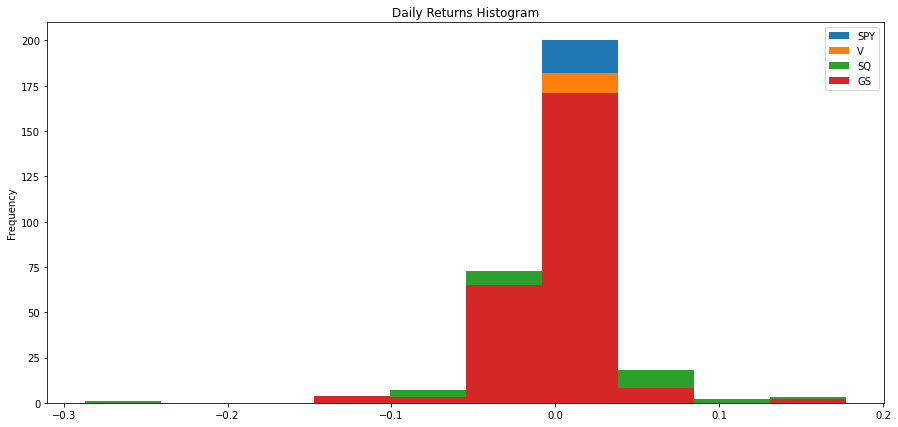

In [12]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Give the plot a title and adjust the figure size
daily_returns_df.plot.hist(
    figsize=(15,7), 
    title="Daily Returns Histogram"
)


<AxesSubplot:title={'center':'Daily Returns Density Plot'}, ylabel='Density'>

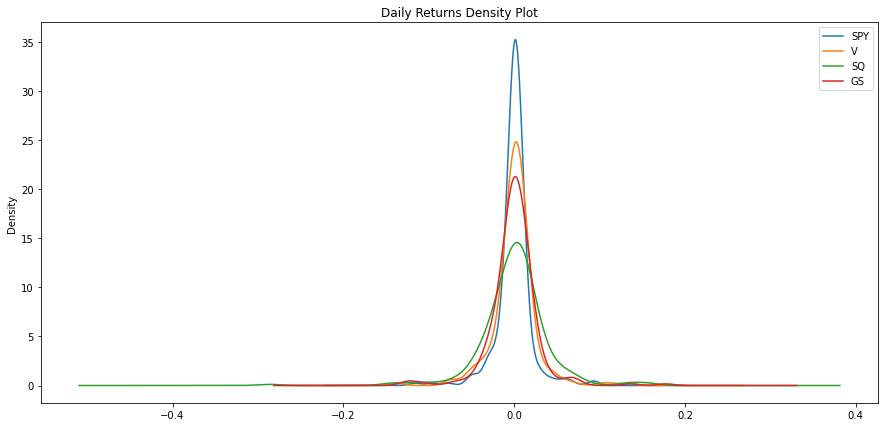

In [13]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size 
daily_returns_df.plot.density(
    figsize=(15,7), 
    title="Daily Returns Density Plot"
)

## Step 9: Answer the following question. 

**Question** Which is the least volatile stock in the group? Which is the most volatile?
    
**Answer** The most volatile stock is SQ (Square, Inc.), an technology communications stock that works with payment processing,  and the least volatile is SPY. SPY represents the S&P500 market index. Due to the broad array of stocks that make up the S&P 500 index, its daily return performance tends to be, over time, less volatile than the individual stocks that comprise the index. 

## Step 10: With a 95% confidence level, calculate the downside and upside performance expectations for both SPY and V based on the mean and standard deviation values.

In [14]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for the SPDR S&P 500 ETF Trust (ticker: SPY)
# Calculate the upside and downside performance expectations using a 95% confidence interval.
# The z-score associated with a 95% confidence interval is 1.96.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_SPY = 0.000082 - (1.96 * 0.020317 )

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_SPY = 0.000082 + (1.96 * 0.020317 )

# Print the expected range of SPY's performance
print(f"Using a 95% confidence interval, "
      f"the SPDR S&P 500 ETF Trust could trade down as much as {(downside_SPY * 100): .4f}%, "
      f"and up as much as {(upside_SPY * 100): .4f}%.")


Using a 95% confidence interval, the SPDR S&P 500 ETF Trust could trade down as much as -3.9739%, and up as much as  3.9903%.


In [15]:
# Based on the daily return summary statistics, access the mean and standard deviation
# values for stock Visa (ticker: V)
# Calculate the upside and downside performance expectations using a 95% confidence interval
# The z-score associated with a 95% confidence interval is 1.96

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_V = 0.000623 - (1.96 * 0.025333)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_V = 0.000623 + (1.96 * 0.025333)

# Print the expected range of Visa's performance
print(f"Using a 95% confidence interval, "
      f"Visa could trade down as much as {(downside_V * 100): .4f}%, "
      f" and up as much as {(upside_V * 100): .4f}%.")

Using a 95% confidence interval, Visa could trade down as much as -4.9030%,  and up as much as  5.0276%.


## Step 11: With a 99% level of confidence, calculate the downside and upside performance expectations for both SQ and GS based on the mean and standard deviation values. 

In [16]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for Square, Inc. (ticker: SQ). 
# Calculate the upside and downside performance expectations using a 99% confidence interval.
# The z-score associated with a 99% confidence interval is 2.576.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_SQ = 0.000242 - (2.576 * 0.040691)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_SQ = 0.000242 + (2.576 * 0.040691)

# Print the expected range of Square, Inc's performance.
print(f"Using a 99% confidence interval, "
      f"Square, Inc. could trade down as much as {(downside_SQ * 100): .4f}%, "
      f"and up as much as {(upside_SQ * 100): .4f}%.")

Using a 99% confidence interval, Square, Inc. could trade down as much as -10.4578%, and up as much as  10.5062%.


In [17]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for Goldman Sachs (ticker: GS). 
# Calculate the upside and downside performance expectations using a 99% confidence interval.
# The z-score associated with a 99% confidence interval is 2.576.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_GS = -0.000155 - (2.576 * 0.028919)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_GS = -0.000155 + (2.576 * 0.028919)

# Print the expected range of Goldman Sach's performance.
print(f"Using a 99% confidence interval, "
      f"Goldman Sachs could trade down as much as {(downside_GS * 100): .4f}%, "
      f"and up as much as {(upside_GS * 100): .4f}%.")

Using a 99% confidence interval, Goldman Sachs could trade down as much as -7.4650%, and up as much as  7.4340%.


## Step 12: Identify the lower and upper performance bounds for the start of each tail for SPY and SQ stocks. Note that the tail risk occurs when the performance measures outside the 99.7% confidence interval.

In [18]:
# Based on the daily return summary statistics, access the mean 
# and standard deviation values for the SPDR S&P 500 ETF Trust (ticker: SPY)
# Identify the lower and upper bounds associated with the tail risk measures
# The tail risk occurs when performance measures outside 
# of the 99.7% confidence interval, or a z-score of 3

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_tail_SPY = 0.000082 - (3 * 0.020317 )

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_tail_SPY = 0.000082 + (3 * 0.020317 )

# Print the expected range of the SPY's performance
print(f"There is a probability of 0.15% "
      f"that the SPDR S&P 500 ETF Trust could trade down more than {(downside_tail_SPY * 100): .4f}%, "
      f"or that it could trade up more than {(upside_tail_SPY * 100): .4f}%.") 


There is a probability of 0.15% that the SPDR S&P 500 ETF Trust could trade down more than -6.0869%, or that it could trade up more than  6.1033%.


In [19]:
# Based on the daily return summary statistics, access the mean 
# and standard deviation values for Square, Inc. (ticker: SQ). 
# Identify the lower and upper bounds associated with the tail risk measures. 
# The tail risk occurs when performance measures outside 
# of the 99.7% confidence interval, or a z-score of 3 

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_tail_SQ = 0.000242 - (3 * 0.040691)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_tail_SQ = 0.000242 +  (3 * 0.040691)

# Print the expected range of the Square Inc's performance
print(f"There is a probability of 0.15% "
      f"that the Square, Inc. could trade down more than {(downside_tail_SQ * 100): .4f}%, "
      f"or that it could trade up more than {(upside_tail_SQ * 100): .4f}%.")


There is a probability of 0.15% that the Square, Inc. could trade down more than -12.1831%, or that it could trade up more than  12.2315%.
